In [1]:
# %autosave 0

Autosave disabled


# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model
for classifying images of clothes


## 8.1 Fashion classification

Dataset: 

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

* https://cs231n.github.io/

In [ ]:
# !git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

2023-11-19 22:39:07.617515: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
from tensorflow.keras.preprocessing.image import load_img

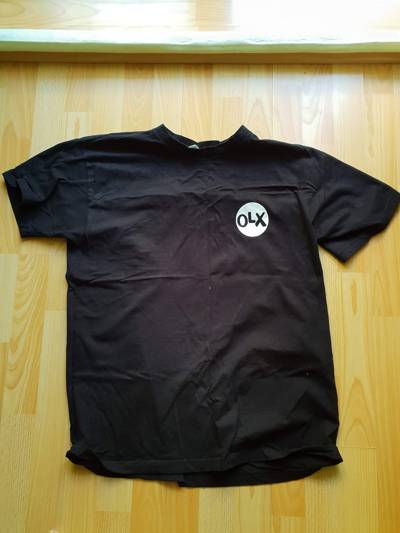

In [4]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [5]:
img = load_img(fullname, target_size=(299, 299))

In [6]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/


In [7]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [8]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2023-11-19 22:45:20.471097: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-19 22:45:20.477515: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-19 22:45:20.478124: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-19 22:45:20.479143: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

91884032/91884032 [==============================] - 2s 0us/step


In [9]:
X = np.array([x])

In [10]:
X.shape

(1, 299, 299, 3)

In [11]:
X = preprocess_input(X)

In [12]:
pred = model.predict(X)

2023-11-19 22:45:42.367820: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-19 22:45:42.999887: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-19 22:45:43.000322: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-19 22:45:43.000359: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-19 22:45:43.000919: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-19 22:45:43.001016: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


In [14]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960026),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884127),
  ('n04525038', 'velvet', 0.0018057587)]]

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense 
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [17]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [18]:
X, y = next(train_ds)

In [19]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [20]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [21]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 [==============================] - 2s 0us/step


In [22]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [23]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 16s 136ms/step - loss: 1.2025 - accuracy: 0.6669 - val_loss: 0.9320 - val_accuracy: 0.7478
Epoch 2/10
96/96 [==============================] - 11s 114ms/step - loss: 0.5998 - accuracy: 0.8168 - val_loss: 0.7580 - val_accuracy: 0.8094
Epoch 3/10
96/96 [==============================] - 11s 113ms/step - loss: 0.3980 - accuracy: 0.8732 - val_loss: 0.8945 - val_accuracy: 0.8006
Epoch 4/10
96/96 [==============================] - 11s 114ms/step - loss: 0.2510 - accuracy: 0.9120 - val_loss: 0.9872 - val_accuracy: 0.7830
Epoch 5/10
96/96 [==============================] - 11s 114ms/step - loss: 0.2403 - accuracy: 0.9146 - val_loss: 0.9471 - val_accuracy: 0.7977
Epoch 6/10
96/96 [==============================] - 11s 112ms/step - loss: 0.0951 - accuracy: 0.9638 - val_loss: 1.0207 - val_accuracy: 0.7771
Epoch 7/10
96/96 [==============================] - 11s 113ms/step - loss: 0.0678 - accuracy: 0.9785 - val_loss: 0.9260 - val_accuracy: 0.8094

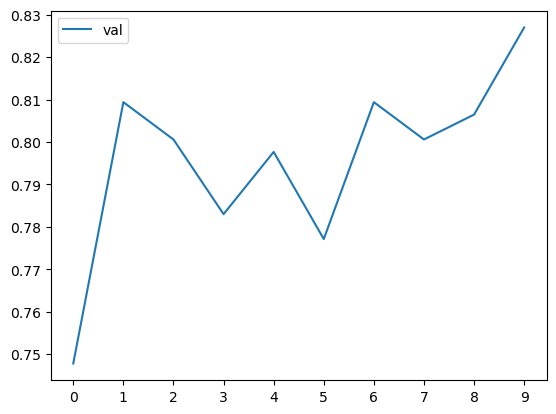

In [24]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

In [25]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [26]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 14s 121ms/step - loss: 2.0097 - accuracy: 0.3204 - val_loss: 1.6000 - val_accuracy: 0.5279
Epoch 2/10
96/96 [==============================] - 11s 112ms/step - loss: 1.4081 - accuracy: 0.5720 - val_loss: 1.2326 - val_accuracy: 0.6510
Epoch 3/10
96/96 [==============================] - 11s 113ms/step - loss: 1.1493 - accuracy: 0.6408 - val_loss: 1.0523 - val_accuracy: 0.7009
Epoch 4/10
96/96 [==============================] - 11s 113ms/step - loss: 1.0084 - accuracy: 0.6806 - val_loss: 0.9427 - val_accuracy: 0.7331
Epoch 5/10
96/96 [==============================] - 11s 114ms/step - loss: 0.9129 - accuracy: 0.7145 - val_loss: 0.8706 - val_accuracy: 0.7507
Epoch 6/10
96/96 [==============================] - 11s 114ms/step - loss: 0.8434 - accuracy: 0.7347 - val_loss: 0.8151 - val_accuracy: 0.7771
Epoch 7/10
96/96 [==============================] - 11s 114ms/step - loss: 0.7910 - accuracy: 0.7471 - val_loss: 0.7794 - val_accuracy:

In [27]:
del scores[0.1]
del scores[0.0001]

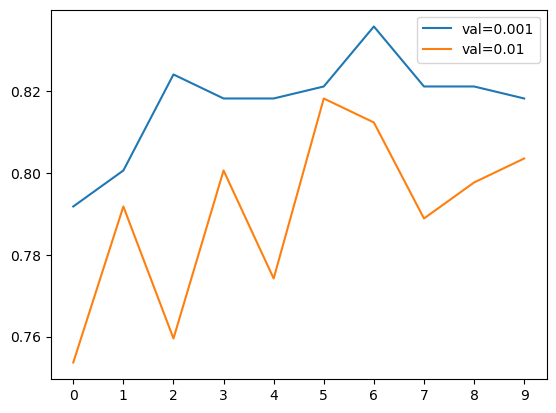

In [28]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [29]:
learning_rate = 0.001

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

In [30]:
model.save_weights('model_v1.h5', save_format='h5')

In [31]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [32]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 [==============================] - 14s 126ms/step - loss: 1.0866 - accuracy: 0.6320 - val_loss: 0.7309 - val_accuracy: 0.7595
Epoch 2/10
96/96 [==============================] - 11s 117ms/step - loss: 0.6321 - accuracy: 0.7894 - val_loss: 0.6245 - val_accuracy: 0.8182
Epoch 3/10
96/96 [==============================] - 11s 112ms/step - loss: 0.5077 - accuracy: 0.8308 - val_loss: 0.5992 - val_accuracy: 0.8006
Epoch 4/10
96/96 [==============================] - 11s 113ms/step - loss: 0.4301 - accuracy: 0.8634 - val_loss: 0.5758 - val_accuracy: 0.8123
Epoch 5/10
96/96 [==============================] - 11s 111ms/step - loss: 0.3685 - accuracy: 0.8947 - val_loss: 0.5787 - val_accuracy: 0.8152
Epoch 6/10
96/96 [==============================] - 11s 116ms/step - loss: 0.3274 - accuracy: 0.9035 - val_loss: 0.5534 - val_accuracy: 0.8299
Epoch 7/10
96/96 [==============================] - 11s 112ms/step - loss: 0.2912 - accuracy: 0.9221 - val_loss: 0.5458 - val_accuracy: 0.8211

## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [33]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [34]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 14s 123ms/step - loss: 1.4522 - accuracy: 0.5085 - val_loss: 0.9846 - val_accuracy: 0.6745
Epoch 2/10
96/96 [==============================] - 11s 113ms/step - loss: 0.7945 - accuracy: 0.7360 - val_loss: 0.7293 - val_accuracy: 0.7830
Epoch 3/10
96/96 [==============================] - 11s 114ms/step - loss: 0.6047 - accuracy: 0.7989 - val_loss: 0.6401 - val_accuracy: 0.7771
Epoch 4/10
96/96 [==============================] - 11s 113ms/step - loss: 0.4966 - accuracy: 0.8370 - val_loss: 0.5829 - val_accuracy: 0.8006
Epoch 5/10
96/96 [==============================] - 11s 113ms/step - loss: 0.4261 - accuracy: 0.8625 - val_loss: 0.5730 - val_accuracy: 0.8152
Epoch 6/10
96/96 [==============================] - 11s 113ms/step - loss: 0.3657 - accuracy: 0.8895 - val_loss: 0.5617 - val_accuracy: 0.8123
Epoch 7/10
96/96 [==============================] - 11s 113ms/step - loss: 0.3191 - accuracy: 0.9074 - val_loss: 0.5692 - val_accuracy: 0.8

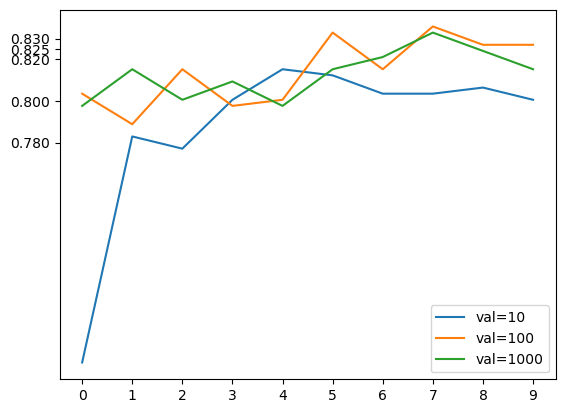

In [35]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [36]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [37]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 14s 121ms/step - loss: 0.9752 - accuracy: 0.6623 - val_loss: 0.6846 - val_accuracy: 0.7595
Epoch 2/30
96/96 [==============================] - 11s 113ms/step - loss: 0.5137 - accuracy: 0.8214 - val_loss: 0.5531 - val_accuracy: 0.8065
Epoch 3/30
96/96 [==============================] - 11s 113ms/step - loss: 0.3587 - accuracy: 0.8801 - val_loss: 0.5275 - val_accuracy: 0.8182
Epoch 4/30
96/96 [==============================] - 11s 114ms/step - loss: 0.2462 - accuracy: 0.9263 - val_loss: 0.5574 - val_accuracy: 0.8240
Epoch 5/30
96/96 [==============================] - 11s 112ms/step - loss: 0.1747 - accuracy: 0.9553 - val_loss: 0.5920 - val_accuracy: 0.8065
Epoch 6/30
96/96 [==============================] - 11s 113ms/step - loss: 0.1217 - accuracy: 0.9762 - val_loss: 0.5942 - val_accuracy: 0.8182
Epoch 7/30
96/96 [==============================] - 11s 112ms/step - loss: 0.0942 - accuracy: 0.9811 - val_loss: 0.5924 - val_accuracy: 0.

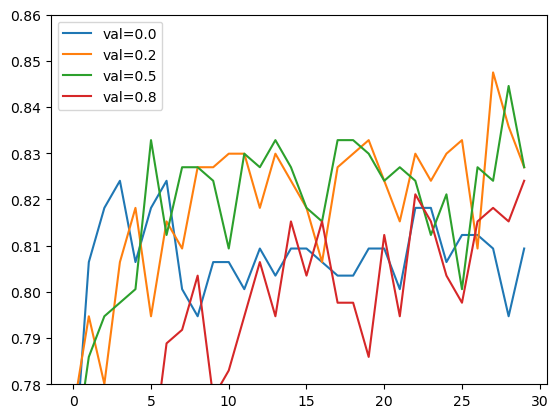

In [38]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

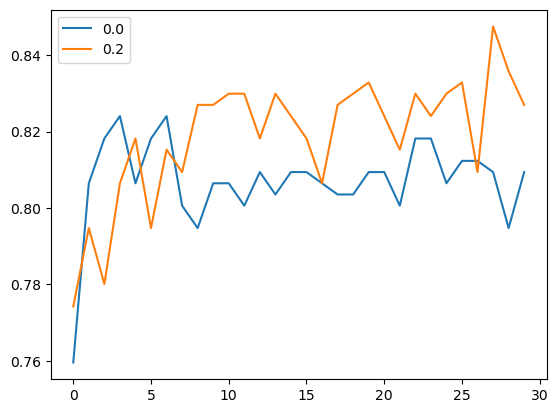

In [39]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

In [40]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [41]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 14s 123ms/step - loss: 1.0417 - accuracy: 0.6463 - val_loss: 0.7060 - val_accuracy: 0.7566
Epoch 2/50
96/96 [==============================] - 11s 113ms/step - loss: 0.6006 - accuracy: 0.7927 - val_loss: 0.6041 - val_accuracy: 0.8065
Epoch 3/50
96/96 [==============================] - 11s 112ms/step - loss: 0.4772 - accuracy: 0.8295 - val_loss: 0.5814 - val_accuracy: 0.8006
Epoch 4/50
96/96 [==============================] - 11s 113ms/step - loss: 0.3687 - accuracy: 0.8739 - val_loss: 0.5827 - val_accuracy: 0.8035
Epoch 5/50
96/96 [==============================] - 11s 113ms/step - loss: 0.2916 - accuracy: 0.9042 - val_loss: 0.5705 - val_accuracy: 0.8006
Epoch 6/50
96/96 [==============================] - 11s 114ms/step - loss: 0.2290 - accuracy: 0.9306 - val_loss: 0.5697 - val_accuracy: 0.8152
Epoch 7/50
96/96 [==============================] - 11s 113ms/step - loss: 0.1854 - accuracy: 0.9436 - val_loss: 0.5754 - val_accuracy: 0.8035

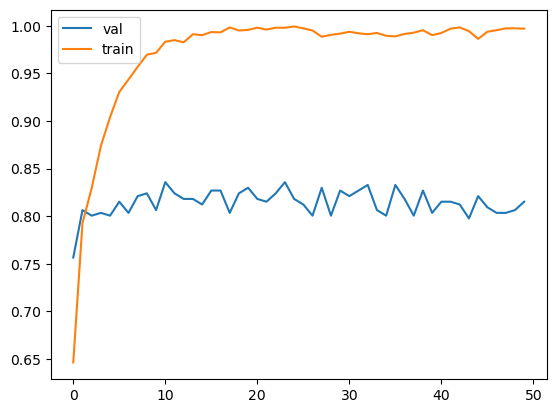

In [42]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

* Train a 299x299 model

In [43]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [44]:
input_size = 299

In [45]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [46]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [47]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 70s 693ms/step - loss: 0.9709 - accuracy: 0.6851 - val_loss: 0.5315 - val_accuracy: 0.8416
Epoch 2/50
96/96 [==============================] - 64s 670ms/step - loss: 0.5227 - accuracy: 0.8211 - val_loss: 0.4438 - val_accuracy: 0.8534
Epoch 3/50
96/96 [==============================] - 64s 667ms/step - loss: 0.4357 - accuracy: 0.8501 - val_loss: 0.4317 - val_accuracy: 0.8387
Epoch 4/50
96/96 [==============================] - 65s 671ms/step - loss: 0.3805 - accuracy: 0.8693 - val_loss: 0.3745 - val_accuracy: 0.8768
Epoch 5/50
96/96 [==============================] - 64s 666ms/step - loss: 0.3380 - accuracy: 0.8801 - val_loss: 0.4161 - val_accuracy: 0.8475
Epoch 6/50
96/96 [==============================] - 64s 668ms/step - loss: 0.3241 - accuracy: 0.8895 - val_loss: 0.3936 - val_accuracy: 0.8534
Epoch 7/50
96/96 [==============================] - 64s 667ms/step - loss: 0.2994 - accuracy: 0.9029 - val_loss: 0.3783 - val_accuracy: 0.8710

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [48]:
import tensorflow as tf
from tensorflow import keras

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [50]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [53]:
model = keras.models.load_model('xception_v4_1_26_0.903.h5')

In [54]:
model.evaluate(test_ds)

12/12 [==============================] - 4s 275ms/step - loss: 0.2545 - accuracy: 0.9005


[0.25451159477233887, 0.9005376100540161]

In [55]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [56]:
img = load_img(path, target_size=(299, 299))

In [57]:
import numpy as np

In [58]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [59]:
X = preprocess_input(X)

In [60]:
pred = model.predict(X)

1/1 [==============================] - 1s 640ms/step


In [61]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [62]:
dict(zip(classes, pred[0]))

{'dress': -4.6138186,
 'hat': -6.220447,
 'longsleeve': -4.225263,
 'outwear': -3.4990656,
 'pants': 10.233423,
 'shirt': -2.7424862,
 'shoes': -4.908071,
 'shorts': 4.226828,
 'skirt': -6.984222,
 't-shirt': -4.3606358}

## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them 

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images

